In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Iris.csv')
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
df.drop(columns=['Id'],inplace=True)
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
features= df.select_dtypes(include='float64')
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

mask = ~((features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))).any(axis=1)
df_clean = df[mask]
print(f"Original dataset size: {df.shape}")
print(f"Dataset size after removing outliers: {df_clean.shape}")

Original dataset size: (150, 5)
Dataset size after removing outliers: (146, 5)


In [10]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
le = LabelEncoder()
df_clean['Species'] = le.fit_transform(df_clean['Species'])
df_clean.head(3)

C:\Users\Thriveedh\AppData\Local\Temp\ipykernel_4164\357869141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Species'] = le.fit_transform(df_clean['Species'])


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [13]:
X = df_clean.drop(columns=['Species']).values
y = df_clean['Species'].values

In [16]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

### Classification using all Features

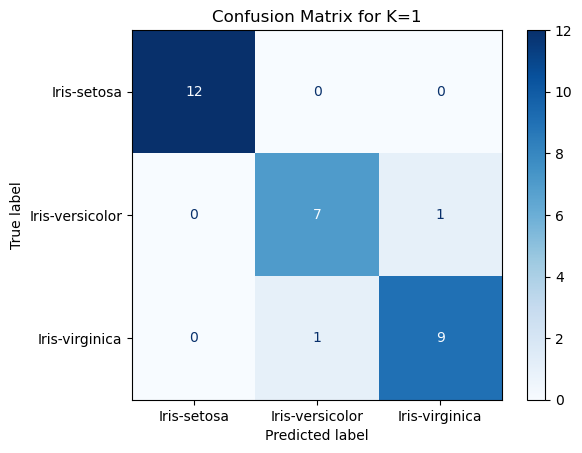


K=1 => Accuracy: 0.93


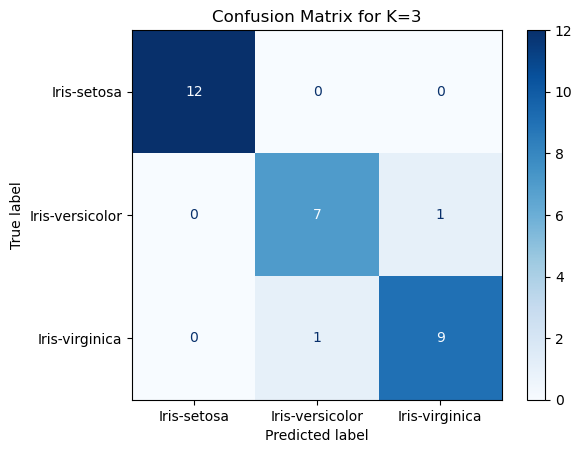


K=3 => Accuracy: 0.93


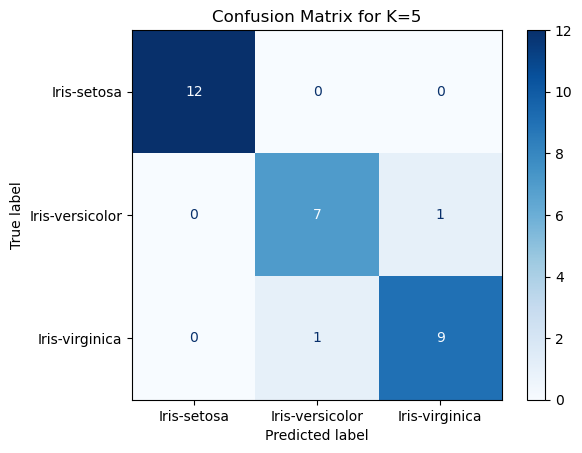


K=5 => Accuracy: 0.93


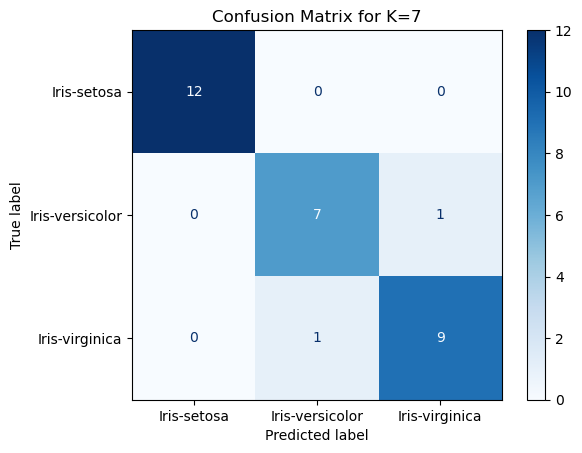


K=7 => Accuracy: 0.93


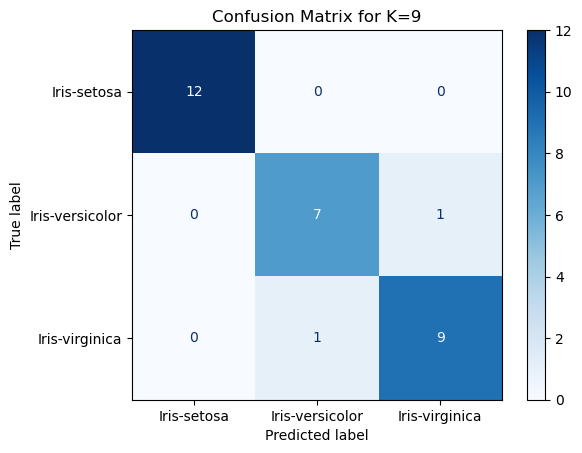


K=9 => Accuracy: 0.93


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for K={k}')
    plt.show()
    print(f"\nK={k} => Accuracy: {acc:.2f}") 


### Classification and Visualization using 2 Selected Features

K=1 => Accuracy: 0.83


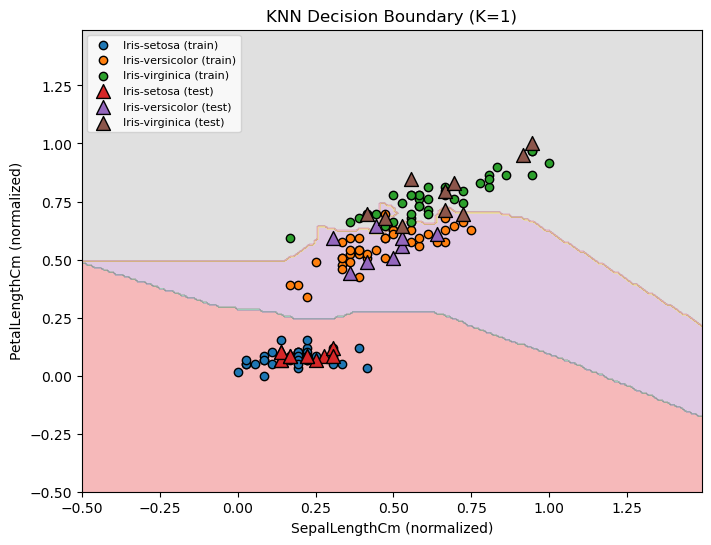

K=3 => Accuracy: 0.90


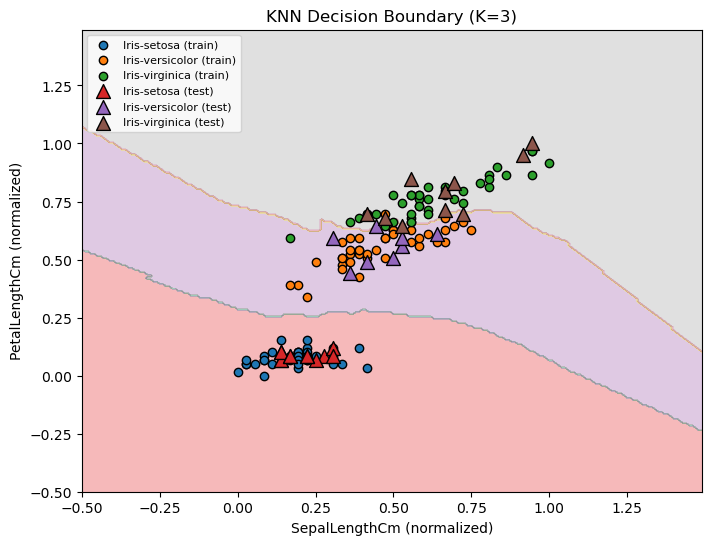

K=5 => Accuracy: 0.93


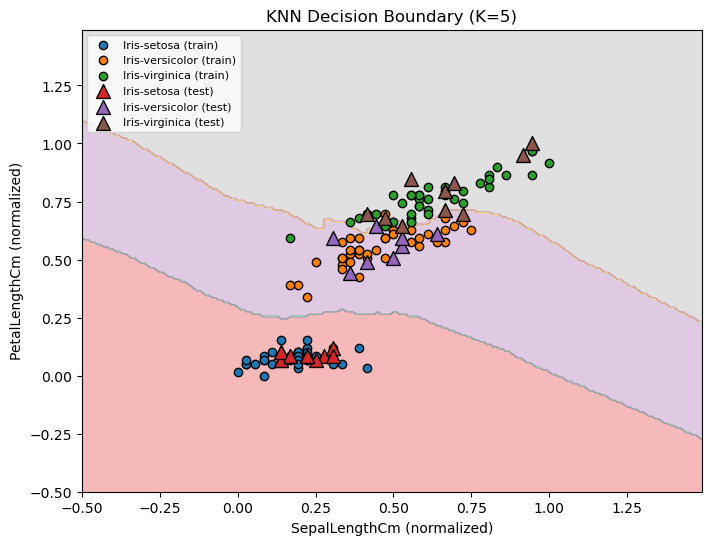

K=7 => Accuracy: 0.90


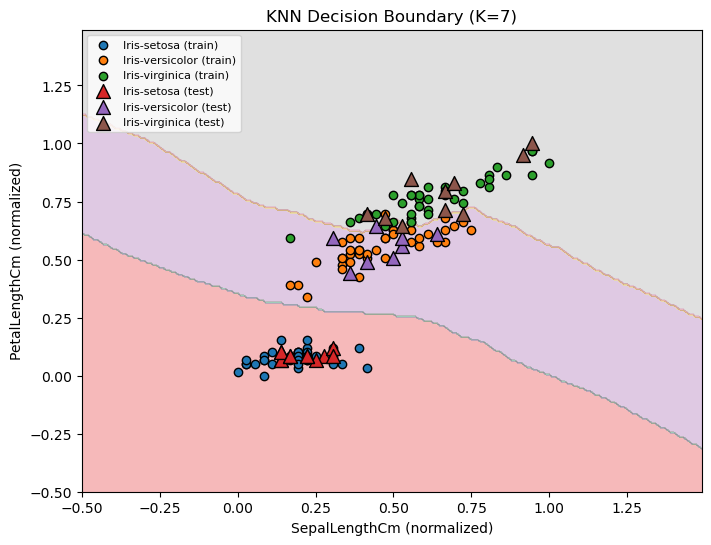

K=9 => Accuracy: 0.93


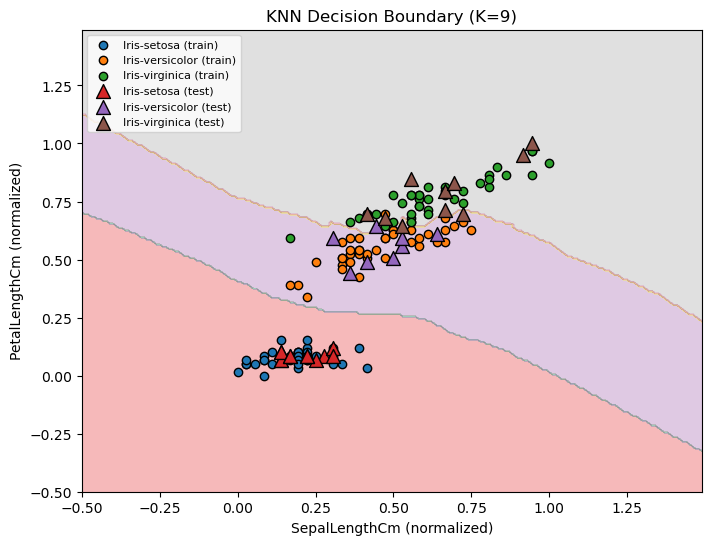

In [26]:
X_two = X_normalized[:, [0, 2]]  # SepalLength and PetalLength

X_train, X_test, y_train, y_test = train_test_split(X_two, y, test_size=0.2, random_state=42)

h = 0.01 

for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"K={k} => Accuracy: {acc:.2f}")

    # Create meshgrid
    x_min, x_max = X_two[:, 0].min() - 0.5, X_two[:, 0].max() + 0.5
    y_min, y_max = X_two[:, 1].min() - 0.5, X_two[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Prediction on meshgrid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting decision boundary and points
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)

    # Plotting training points by class
    for idx, class_label in enumerate(le.classes_):
        plt.scatter(X_train[y_train == idx, 0], X_train[y_train == idx, 1],
                    label=f"{class_label} (train)", edgecolor='k', marker='o')

    # Plotting test points by class
    for idx, class_label in enumerate(le.classes_):
        plt.scatter(X_test[y_test == idx, 0], X_test[y_test == idx, 1],
                    label=f"{class_label} (test)", edgecolor='k', marker='^', s=100)

    plt.xlabel('SepalLengthCm (normalized)')
    plt.ylabel('PetalLengthCm (normalized)')
    plt.title(f"KNN Decision Boundary (K={k})")
    plt.legend(loc='upper left', fontsize=8)
    plt.show()